<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/cv2_freecode/section2/%235Histogram_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histogram

In [36]:
import cv2 as cv
import matplotlib.pyplot as plt
from  google.colab.patches import cv2_imshow
import numpy as np
img = "/content/drive/MyDrive/Colab Notebooks/cv2_freecodecamp/Resources/Photos/cats.jpg"

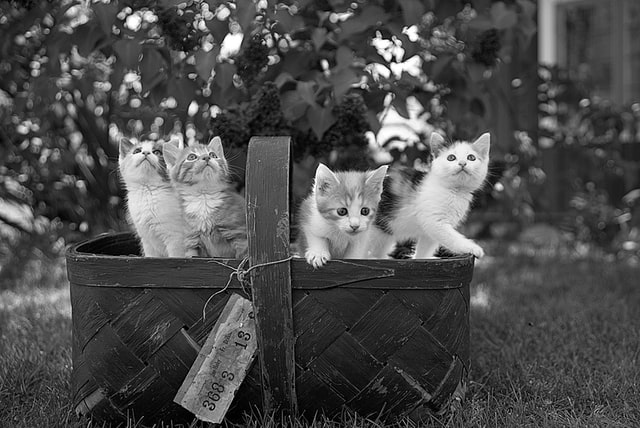

In [37]:
icat = cv.imread(img)
gimg = cv.imread(img , 0)
cv2_imshow(gimg)

So now we use `cv.calcHist()` function to find the histogram. Let's familiarize with the function and its parameters :

`cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])`

**images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

**channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

**mask :** mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

**histSize :** this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

**ranges :** this is our RANGE. Normally, it is [0,256].

In [18]:
# assert img is not None, "file could not be read, check with os.path.exists()"
gray_hist = cv.calcHist([gimg],[0],None ,[256] , [0,256] )

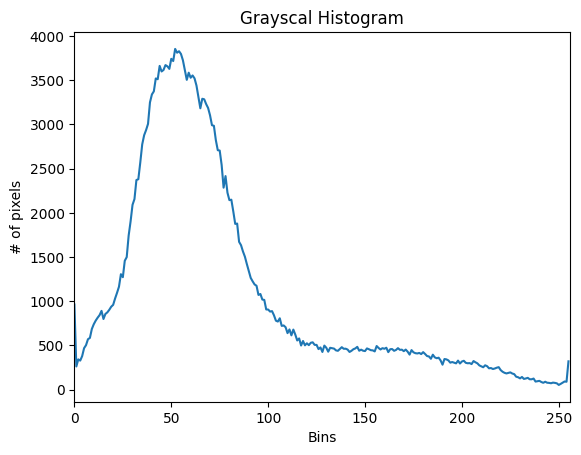

In [19]:
plt.figure()
plt.title("Grayscal Histogram")
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

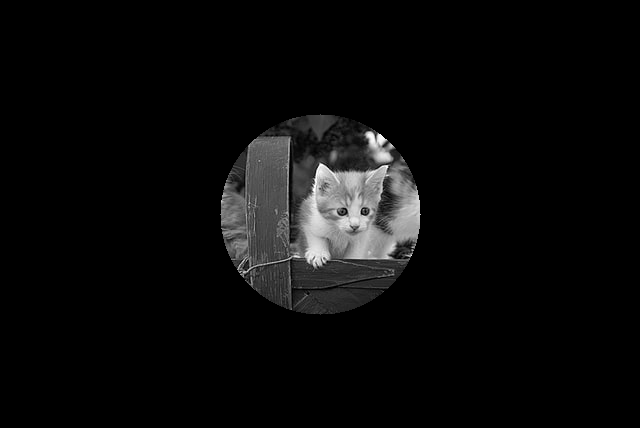

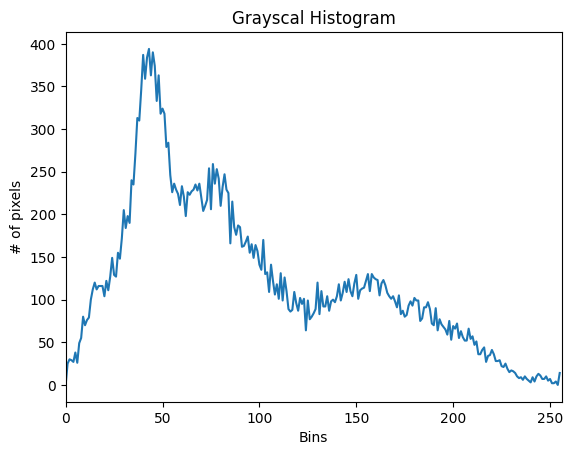

In [24]:
# using MASK
blank  = np.zeros(icat.shape[:2] , dtype = 'uint8')
circle = cv.circle(blank.copy(), (icat.shape[1]//2,icat.shape[0]//2), 100, 255 , -1)
mask = cv.bitwise_and(gimg,gimg , mask=circle)
cv2_imshow(mask)
mask_gray_hist = cv.calcHist([gimg],[0],mask,[256] , [0,256] )
plt.figure()
plt.title("Grayscal Histogram")
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(mask_gray_hist)
plt.xlim([0,256])
plt.show()

## Histogram for color Image

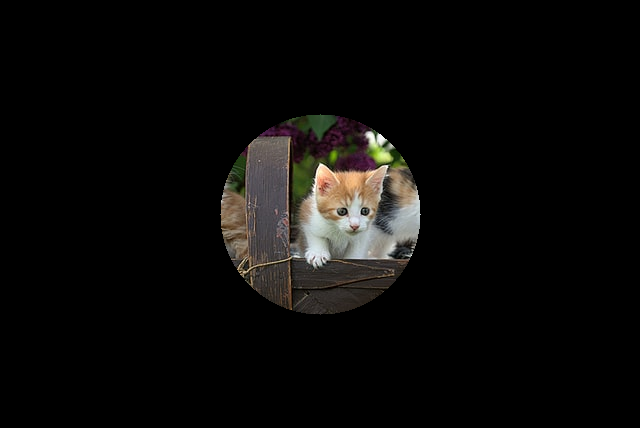

In [33]:
# from above we use
#  blank  = np.zeros(icat.shape[:2] , dtype = 'uint8')
#  circle = cv.circle(blank.copy(), (icat.shape[1]//2,icat.shape[0]//2), 100, 255 , -1)
maskc =  cv.bitwise_and(icat , icat , mask = circle )
cv2_imshow(maskc)

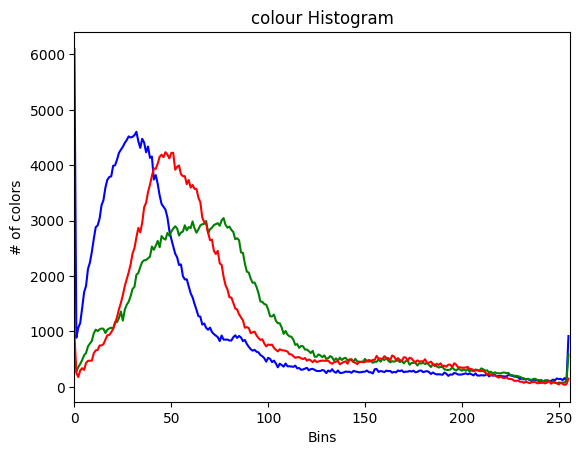

In [34]:
# Color histogram  for full image not mask
plt.figure()
plt.title('colour Histogram')
plt.xlabel('Bins')
plt.ylabel("# of colors")
colors = ('b' , 'g' , 'r')
for i,col in enumerate(colors):
  hist = cv.calcHist([icat],[i] ,None , [256] , [0,256] )
  plt.plot(hist , color = col)
  plt.xlim([0,256])

plt.show()

# ✨✨ -> In this we put masked

### Using Mask in Color Image

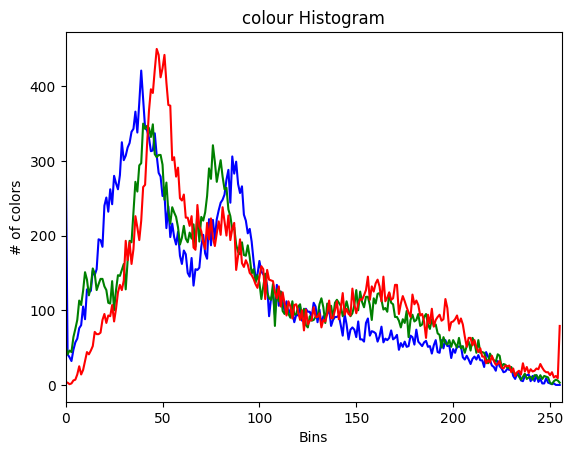

In [35]:
# Color histogram  for full image not mask
plt.figure()
plt.title('colour Histogram')
plt.xlabel('Bins')
plt.ylabel("# of colors")
colors = ('b' , 'g' , 'r')
for i,col in enumerate(colors):
  histc = cv.calcHist([icat],[i] ,mask , [256] , [0,256] )
  plt.plot(histc , color = col)
  plt.xlim([0,256])
plt.show()